In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time

from Particledrop import Landing_Flashes

import trackpy

plt.close('all')

fov = [160,230]
nf = 50
testframe = nf-1

#make a simulated dataset
meas = Landing_Flashes(seed = 314, fov=fov, numpar = 50, nframes = nf, signal = 15, sizevar=0.8, noise = 0, normalvar = False, dark = 10, psize = 2, unevenIllumination = False)
plis = meas.parlist
movie = meas.genStack()

def execute_amovie(moviedata):
    fig = plt.figure()
    axis = plt.axes()
    
    film = plt.imshow(moviedata[0])
    
    def init(): 
        film.set_data(moviedata[0])
        return [film]
    
    def animate(i):
        film.set_array(moviedata[i])
        return [film]
    
    anim = FuncAnimation(fig, animate, init_func = init, 
                         frames = moviedata.shape[0], interval = 20, blit = True)

    return anim


def filmpje(moviedata):
    plt.figure()
    for i in range(nf):
        time.sleep(1./100)
        plt.imshow(moviedata[i,:,:])
        plt.show()
    return



(array([4., 5., 5., 2., 2., 8., 7., 4., 8., 5.]),
 array([ 9.07884101, 10.26484478, 11.45084854, 12.63685231, 13.82285607,
        15.00885984, 16.19486361, 17.38086737, 18.56687114, 19.7528749 ,
        20.93887867]),
 <a list of 10 Patch objects>)

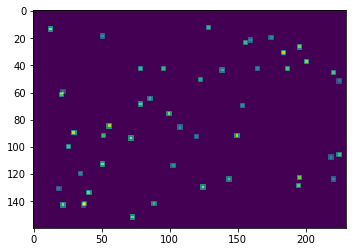

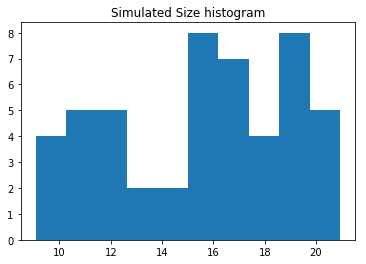

In [2]:
#mess around with the noise
meas.noise = 0
plis = meas.parlist
movie = meas.genStack()

plt.imshow(movie[-1,:,:])

plt.figure()
plt.title('Simulated Size histogram')
plt.hist(plis[:,2])
#plt.savefig('GraphsandIms\\Simulated size histogram')

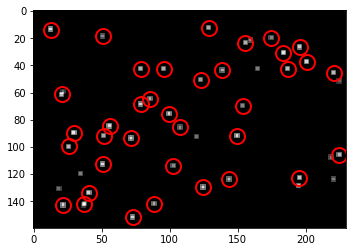

37


In [9]:
f = trackpy.locate(movie[testframe], 5, minmass = 20, invert = False)
trackpy.annotate(f, movie[testframe]);
print(len(f['mass']))

37


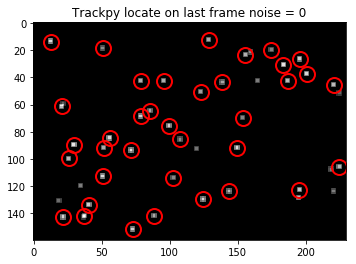

38


<Figure size 432x288 with 0 Axes>

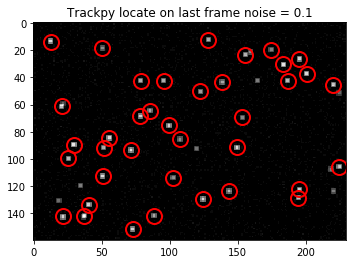

39


<Figure size 432x288 with 0 Axes>

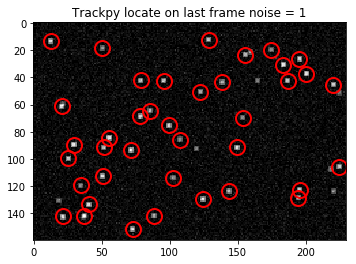

39


<Figure size 432x288 with 0 Axes>

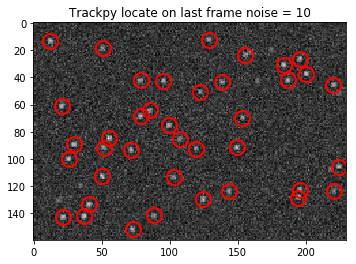

<Figure size 432x288 with 0 Axes>

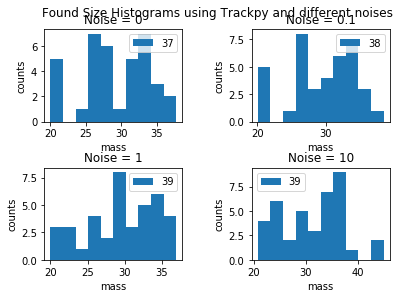

In [10]:
#Run trackpy on the movie, with different levels of noise, make histograms

noises = [0,0.1,1,10]
masses = []
for i in range(len(noises)): 
    noise = noises[i]
    meas.noise = noise
    plis = meas.parlist
    movie = meas.genStack()

    
    f = trackpy.locate(movie[testframe], 5, minmass = 20, invert = False)
    print(len(f['mass']))

    masses.append(f['mass'])
     
    plt.figure()
    plt.title('Trackpy locate on last frame noise = '+ str(noise))
    trackpy.annotate(f, movie[testframe]);
    plt.savefig('GraphsandIms\\Trackpy_nobgcor_noise'+str(i))


fig, axs = plt.subplots(2,2)
fig.suptitle('Found Size Histograms using Trackpy and different noises')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)

axs[0,0].hist(masses[0], label = str(len(masses[0])))
axs[0, 0].set_title('Noise = ' + str(noises[0]))
axs[0,0].legend(prop={'size': 10})
axs[0,1].hist(masses[1],  label = str(len(masses[1])))
axs[0, 1].set_title('Noise = ' + str(noises[1]))
axs[0,1].legend(prop={'size': 10})
axs[1,0].hist(masses[2],  label = str(len(masses[2])))
axs[1, 0].set_title('Noise = ' + str(noises[2]))
axs[1,0].legend(prop={'size': 10})
axs[1,1].hist(masses[3],  label = str(len(masses[3])))
axs[1, 1].set_title('Noise = ' + str(noises[3]))
axs[1,1].legend(prop={'size': 10})


for ax in axs.flat:
    ax.set(xlabel='mass', ylabel='counts')


In [3]:
#Do simple backgroundcorrection
#Simple mode: Take off the reference (= median), divide by reference - dark

def Simple_backgroundcor(mov):
    bg = np.median(mov,axis=0)

    backgroundcor = np.zeros((nf,mov[0].shape[0],mov[0].shape[1]))

    dark = np.ones((fov))*10
    for i in range(nf):
        backgroundcor[i] = (mov[i] - bg)/(bg-dark)

    #Set negative values to 0 
    backgroundcor[backgroundcor<0] = 0  
    
    return backgroundcor


0


C:\Users\sjoer\Anaconda3\lib\site-packages\trackpy\feature.py:425: UserWarning: No maxima survived mass- and size-based filtering. Be advised that the mass computation was changed from version 0.2.4 to 0.3.0 and from 0.3.3 to 0.4.0. See the documentation and the convenience functions 'minmass_v03_change' and 'minmass_v04_change'.
  warnings.warn("No maxima survived mass- and size-based filtering. "


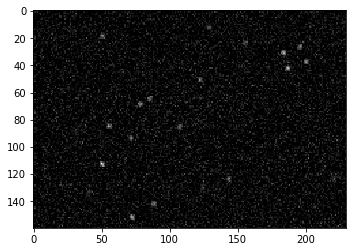

In [12]:
meas.noise = 10
plis = meas.parlist
movie = meas.genStack()

backgroundcorrected = Simple_backgroundcor(movie)

f = trackpy.locate(backgroundcorrected[testframe], 5, minmass = 20, invert = False)
print(len(f['mass']))
trackpy.annotate(f, backgroundcorrected[testframe]);

4


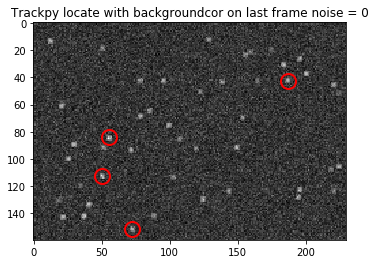

4


<Figure size 432x288 with 0 Axes>

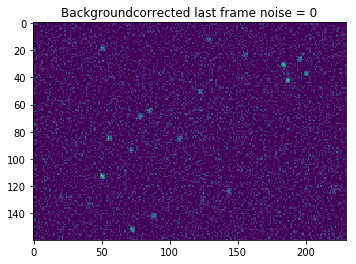

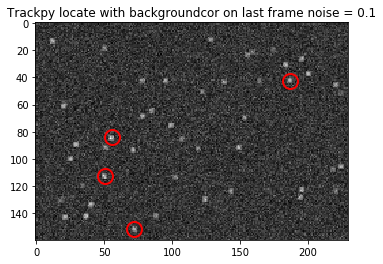

4


<Figure size 432x288 with 0 Axes>

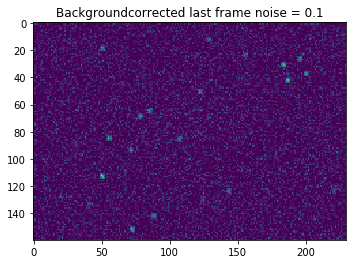

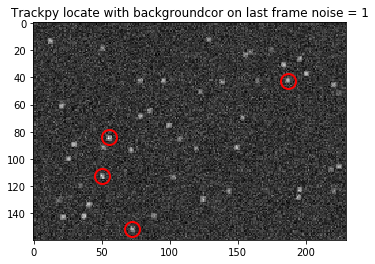

4


<Figure size 432x288 with 0 Axes>

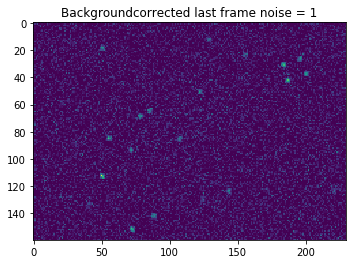

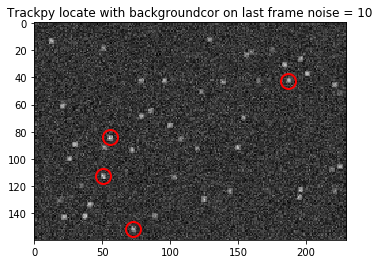

<Figure size 432x288 with 0 Axes>

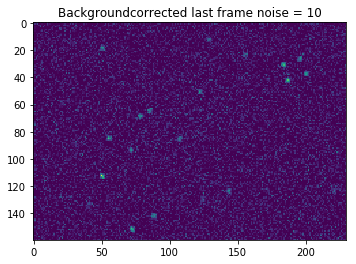

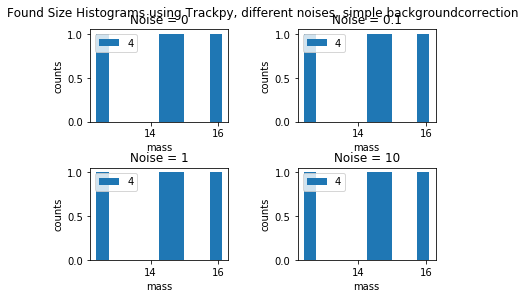

In [13]:
#Make histograms for 4 different levels of noise
plt.close('all')

noises = [0,0.1,1,10]
masses = []
for i in range(len(noises)): 
    noise = noises[i]
    plis = meas.parlist
    movie = meas.genStack()
    backgroundcor = Simple_backgroundcor(movie)
    
    testframe = nf-1
    
    f = trackpy.locate(backgroundcor[testframe], 15, minmass = 12, invert = False)
    print(len(f['mass']))

    masses.append(f['mass'])
     
    plt.figure()
    plt.title('Trackpy locate with backgroundcor on last frame noise = '+ str(noise))
    trackpy.annotate(f, movie[testframe]);
    plt.savefig('GraphsandIms\\Trackpy_withbgcor_noise'+str(i))
    
    plt.figure()
    plt.title('Backgroundcorrected last frame noise = ' + str(noise))
    plt.imshow(backgroundcor[testframe])


fig, axs = plt.subplots(2,2)
fig.suptitle('Found Size Histograms using Trackpy, different noises, simple backgroundcorrection')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)

axs[0,0].hist(masses[0], label = str(len(masses[0])))
axs[0, 0].set_title('Noise = ' + str(noises[0]))
axs[0,0].legend(prop={'size': 10})
axs[0,1].hist(masses[1],  label = str(len(masses[1])))
axs[0, 1].set_title('Noise = ' + str(noises[1]))
axs[0,1].legend(prop={'size': 10})
axs[1,0].hist(masses[2],  label = str(len(masses[2])))
axs[1, 0].set_title('Noise = ' + str(noises[2]))
axs[1,0].legend(prop={'size': 10})
axs[1,1].hist(masses[3],  label = str(len(masses[3])))
axs[1, 1].set_title('Noise = ' + str(noises[3]))
axs[1,1].legend(prop={'size': 10})


for ax in axs.flat:
    ax.set(xlabel='mass', ylabel='counts')
    